In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import json
with open('D:\\data analysis\\football analytics\\events_England.json') as f:
    data=json.load(f)
english_df=pd.DataFrame(data)

In [3]:
eng_shot=english_df[english_df['eventId']==10]

In [4]:
with open('D:\\data analysis\\football analytics\\events_France.json') as f:
    data=json.load(f)
french_df=pd.DataFrame(data)

In [5]:
french_shot=french_df[french_df['eventId']==10]

In [6]:
with open('D:\\data analysis\\football analytics\\events_Spain.json') as f:
    data=json.load(f)
spanish_df=pd.DataFrame(data)
spanish_shot=spanish_df[spanish_df['eventId']==10]

In [7]:
with open('D:\\data analysis\\football analytics\\events_Italy.json') as f:
    data=json.load(f)
italian_df=pd.DataFrame(data)
italian_shot=italian_df[italian_df['eventId']==10]

In [8]:
with open('D:\\data analysis\\football analytics\\events_Germany.json') as f:
    data=json.load(f)
german_df=pd.DataFrame(data)
german_shot=german_df[german_df['eventId']==10]

In [9]:
combined=[eng_shot,french_shot,german_shot,italian_shot,spanish_shot]
all_shots=pd.concat(combined)

In [10]:
ycorr=[]
xcorr=[]
angle=[]
distance=[]
convert=[]
Shot_df=all_shots
for i,Shot in Shot_df.iterrows():
    #positions=Shot_df.loc[[i],["positions"]]
    #print(Shot_df["positions"])
    x=(100-Shot['positions'][0]['x'])*1.05
    y=abs(Shot['positions'][0]['y']-50)*0.65
    r=np.sqrt(x**2+y**2)
    ycorr.append(y)
    xcorr.append(x)
    distance.append(round(r,1))
    theta=np.arctan(7.32*x/(r**2-3.66**2))
    #print(theta)
    if theta<=0:
        theta=np.pi+theta
    angle.append(round(theta*180/np.pi))
    flag=0
    for tgs in Shot['tags']:
        if(tgs['id']==101):
            convert.append(1)
            flag=1
    if(flag==0):
        convert.append(0)
table=pd.DataFrame(list(zip(distance,angle,convert)),columns=['Distance(m)','Angle','Goal'])
table
table.to_csv('shots_taken.csv')

In [11]:
angle=list(table.Angle.unique())
angle.sort()
all_angles=pd.DataFrame(angle,columns=['angle'])
all_angles['goals']=0
all_angles['shots']=0

In [12]:
for i in range(0,table.__len__()):
    if(table.at[i,'Goal']==1):
        all_angles.loc[all_angles['angle']==table.at[i,'Angle'],'goals']+=1
    all_angles.loc[all_angles['angle']==table.at[i,'Angle'],'shots']+=1

In [13]:
all_angles['prob']=0
for i in range(0,all_angles.__len__()):
    all_angles.loc[i,'prob']=all_angles.loc[i,'goals']/all_angles.loc[i,'shots']
all_angles

,angle,goals,shots,prob
0,3,1,10,0.100000
1,4,3,35,0.085714
2,5,1,26,0.038462
3,6,2,76,0.026316
4,7,5,131,0.038168
...,...,...,...,...
79,138,7,7,1.000000
80,144,7,9,0.777778
81,147,12,12,1.000000
82,148,2,2,1.000000


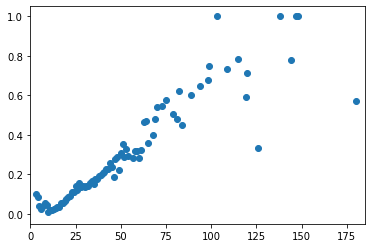

In [14]:
import matplotlib.pyplot as plt
plt.scatter(all_angles['angle'],all_angles['prob'])
plt.ylim((-0.05,1.05))
plt.xlim((-0.05,185))
plt.xlabel
plt.show()

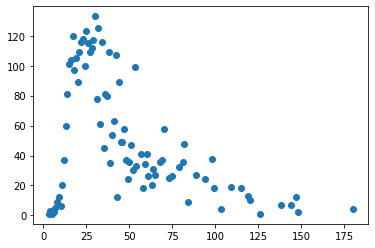

In [15]:
plt.scatter(all_angles['angle'],all_angles['goals'])
plt.show()

In [16]:
dist=list(table['Distance(m)'].unique())
dist.sort()
dist_df=pd.DataFrame(dist,columns=['dist'])
dist_df['goals']=0
dist_df['shots']=0
dist_df

,dist,goals,shots
0,0.6,0,0
1,1.0,0,0
2,1.2,0,0
3,1.3,0,0
4,1.7,0,0
...,...,...,...
517,99.8,0,0
518,101.9,0,0
519,102.1,0,0
520,102.3,0,0


In [17]:
for i in range(0,table.__len__()):
    if(table.at[i,'Goal']==1):
        dist_df.loc[dist_df['dist']==table.at[i,'Distance(m)'],'goals']+=1
    dist_df.loc[dist_df['dist']==table.at[i,'Distance(m)'],'shots']+=1
dist_df

,dist,goals,shots
0,0.6,1,1
1,1.0,2,2
2,1.2,12,12
3,1.3,1,1
4,1.7,7,9
...,...,...,...
517,99.8,0,2
518,101.9,1,2
519,102.1,0,1
520,102.3,0,1


In [18]:
dist_df['prob']=float(0)
for i in range(0,len(dist_df)):
    dist_df.at[i,'prob']=float(dist_df.at[i,'goals'])/dist_df.at[i,'shots']
dist_df

,dist,goals,shots,prob
0,0.6,1,1,1.000000
1,1.0,2,2,1.000000
2,1.2,12,12,1.000000
3,1.3,1,1,1.000000
4,1.7,7,9,0.777778
...,...,...,...,...
517,99.8,0,2,0.000000
518,101.9,1,2,0.500000
519,102.1,0,1,0.000000
520,102.3,0,1,0.000000


<Figure size 0x0 with 0 Axes>

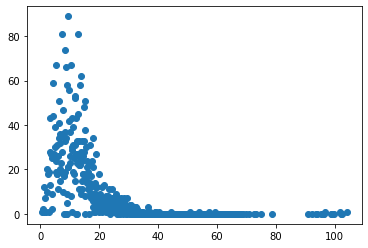

<Figure size 0x0 with 0 Axes>

In [19]:
from matplotlib.pyplot import figure
plt.scatter(dist_df['dist'],dist_df['goals'])
figure(figsize=(10, 8), dpi=0)


In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
fitangle=smf.glm(formula="Goal ~ Angle" , data=table, 
                           family=sm.families.Binomial()).fit()
fitangle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Goal   No. Observations:                40461
Model:                            GLM   Df Residuals:                    40459
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12010.
Date:                Tue, 24 Aug 2021   Deviance:                       24020.
Time:                        10:36:30   Pearson chi2:                 3.90e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6205      0.035   -102.884      0.000      -3.689      -3.552
Angle          0.0521      0.001     53.530      0.000       0.050       0.054
==============================================================================
"""

In [24]:
b=fitangle.params
tempx=np.arange(175,step=0.01)
xG=1/(1+np.exp(-b[0]-b[1]*tempx))

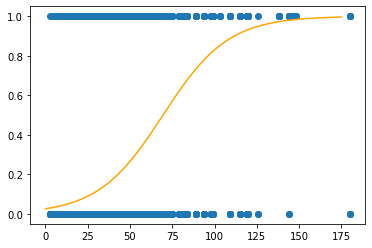

In [25]:
plt.scatter(table['Angle'],table['Goal'])
plt.plot(tempx,xG,color='orange')

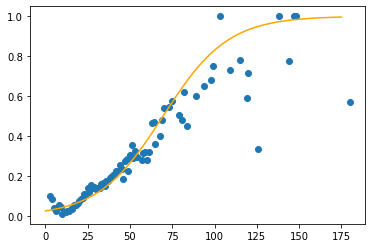

In [26]:
plt.scatter(all_angles['angle'],all_angles['prob'])
plt.plot(tempx,xG,color='orange')

In [27]:
def dis(w):
    n=len(table)
    Hsum=0
    for i in range(n):
        x=table.at[i,'Distance(m)']
        if(table.at[i,'Goal']==1):
            Hsum+=np.log(1+np.exp(-w[0]-w[1]*x))
        else:
            Hsum+=np.log(1+np.exp(w[0]+w[1]*x))
    return Hsum

In [30]:
from scipy.optimize import fmin
distcoeff=fmin(dis,(0,0))

Optimization terminated successfully.
         Current function value: 11946.604023
         Iterations: 56
         Function evaluations: 105


In [33]:
distcoeff

array([ 0.10431016, -0.1480186 ])

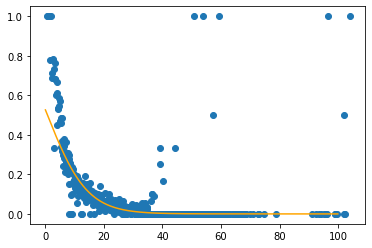

In [36]:
pdist=lambda r:1/(1+np.exp(-distcoeff[0]-distcoeff[1]*r))
r=np.arange(100,step=0.1)
plt.plot(r,pdist(r),color='orange')
plt.scatter(dist_df['dist'],dist_df['prob'])

In [38]:
table['dist']=table['Distance(m)']
combined_model=smf.glm(formula='Goal ~ Angle + dist',data=table,family=sm.families.Binomial()).fit()
print(combined_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Goal   No. Observations:                40461
Model:                            GLM   Df Residuals:                    40458
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11788.
Date:                Tue, 24 Aug 2021   Deviance:                       23575.
Time:                        10:55:44   Pearson chi2:                 1.23e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5461      0.103    -15.064      0.0

In [41]:
combined_b=combined_model.params

In [46]:
def xG_calculate(Angle,dist):
    expsum=combined_b[0]+combined_b[1]*Angle+combined_b[2]*dist
    xG=1/(1+np.exp(-expsum))
    return xG

In [48]:
xG_calculate(78,15)

0.2983271718392127

In [49]:
def halfpitch():
    import matplotlib.pyplot as plt
    from matplotlib.patches import Arc
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    pitchcolor='black'
    #outline
    plt.plot([0,65],[0,0],color=pitchcolor)
    plt.plot([65,65],[0,52.5],color=pitchcolor)
    plt.plot([65,0],[52.5,52.5],color=pitchcolor)
    plt.plot([0,0],[52.5,0],color=pitchcolor)
    
    #goal
    plt.plot([65/2-3.66,65/2-3.66],[0,-3],color=pitchcolor)
    plt.plot([65/2+3.66,65/2+3.66],[0,-3],color=pitchcolor)
    plt.plot([65/2-3.66,65/2+3.66],[-3,-3],color=pitchcolor)
    
    #penarea
    plt.plot([65/2-16.5-3.66,65/2-16.5-3.66],[0,16.5],color=pitchcolor)
    plt.plot([65/2+16.5+3.66,65/2+16.5+3.66],[0,16.5],color=pitchcolor)
    plt.plot([65/2-16.5-3.66,65/2+16.5+3.66],[16.5,16.5],color=pitchcolor)
    
    #6 yard box
    plt.plot([65/2-5.5-3.66,65/2-5.5-3.66],[0,5.5],color=pitchcolor)
    plt.plot([65/2+5.5+3.66,65/2+5.5+3.66],[0,5.5],color=pitchcolor)
    plt.plot([65/2-5.5-3.66,65/2+5.5+3.66],[5.5,5.5],color=pitchcolor)
    
    #pen spot
    penspot=plt.Circle((65/2,11),0.8,color=pitchcolor)
    ax.add_patch(penspot)
    
    penarc=Arc((65/2,11),height=18.3,width=18.3,angle=0,theta1=90-53,theta2=90+53,color=pitchcolor)
    ax.add_patch(penarc)
    
    #midarc
    midarc=Arc((65/2,52.5),height=18.3,width=18.3,angle=0,theta1=180,theta2=360,color=pitchcolor)
    ax.add_patch(midarc)
    
    plt.axis('off')
    return fig,ax

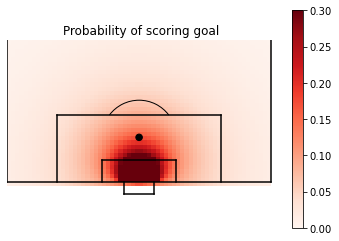

In [51]:
prob_2d=np.zeros((65,65))
for x in range(65):
    for y in range(65):
        theta=np.arctan(7.32*x/(x**2+abs(y-65/2)**2-3.66**2))
        if(theta<0):
            theta+=np.pi
        prob_2d[x,y]=xG_calculate(theta*180/np.pi,np.sqrt(x**2+abs(y-65/2)**2))
(fig,ax)=halfpitch()
image=ax.imshow(prob_2d,interpolation='nearest',extent=[-1,65,65,-1],aspect='auto',cmap=plt.cm.Reds,vmin=0,vmax=0.3)
fig.colorbar(image,ax=ax)
ax.set_title('Probability of scoring goal')
plt.xlim((0,66))
plt.ylim((-4,35))
plt.gca().set_aspect('equal',adjustable='box')
plt.show()
fig.savefig('xGmodel.pdf',dpi=None,bbox_inches='tight')